In [32]:
import deeptrack as dt
from deeptrack.models.yolo import utils
import numpy as np
import matplotlib.pyplot as plt

from simulation import *

In [33]:
sim= MultiParticle(
    
    
    n_particles = lambda: int(np.random.rand()*10) + 15,
        
    
)
starting_value = dt.Value(lambda: np.ones((IMAGE_SIZE, IMAGE_SIZE)))

sim= starting_value >> MultiParticle(
    n_particles = lambda: int(np.random.rand()*10) + 15,
)

particle =  sim[0]
pos =  sim[1]
rad =  sim[2]






In [37]:
print(pos.resolve())
print(rad.resolve())

Image(array([[85.72066666, 66.04291721],
       [72.62186866, 23.58258982],
       [85.43722613,  9.79303226],
       [96.49602231, 14.03784216],
       [35.22575999, 87.875854  ],
       [80.07093799, 65.99742253],
       [84.83077608,  5.83268045],
       [59.30927071, 49.74615271],
       [39.8469545 , 26.84066315],
       [90.65229715,  9.54106754],
       [95.96146352, 71.89563604],
       [79.44368502, 67.25071746],
       [49.54973648, 35.25341133],
       [69.9049665 , 88.31411317],
       [15.75120909, 24.17876551],
       [12.79448275, 31.57025154],
       [50.22501358, 52.91882939],
       [26.85754311, 73.36861306],
       [97.13141643, 26.57285339],
       [70.90262571, 80.00018921],
       [10.81937631, 62.77248847]]))
Image(array([[2.02084138],
       [2.2061614 ],
       [2.17646638],
       [2.41802979],
       [2.8660484 ],
       [2.70008063],
       [2.75013692],
       [2.22225965],
       [2.22726485],
       [2.94332421],
       [2.73244478],
       [2.31969568],

In [38]:
gradient = dt.IlluminationGradient(
    gradient=[.5e-3, 0e-3],#lambda: 1e-3 + np.random.randn(2) * 1e-3,
)

class Normalize(dt.Feature):
    def __init__(
        self, **kwargs
    ):
        super().__init__( **kwargs)

    def get(self, image, **kwargs):
        image = image / np.max(image)
        return image

normalization = Normalize()

gauss = dt.Gaussian(mu = 0, sigma = .01)

import scipy
#Smoothing
kernel = np.ones((3, 3)) / 15
smoothing = dt.Lambda(lambda: lambda image: scipy.ndimage.filters.convolve(image, kernel)) 

particle = particle >>  smoothing  >>gauss >> normalization 

In [101]:
"""def get_label(a, b):
    a = a.resolve()
    b = b.resolve()
    n = int(np.shape(a)[0])
    label = np.zeros((n,4))

    for i in range(n):
        label[i,:] = [int(a[i, 0]), int(a[i, 1]), b[i], b[i]]

    
    return label #(np.asarray(a.resolve()), np.asarray(b.resolve()))"""

def get_label(x):
        
    a, b = x
  
    """label = np.zeros((n, 4))

    for i in range ( n ):
        label[i, : ] = [int(x[i, 0]), int(x[i, 1]), 2, 2]"""

    #return label

In [102]:
pos_and_rad = pos & rad

bboxes = pos_and_rad >> get_label
#bboxes.resolve()
#data = particle & bboxes
#print(data.resolve())

In [103]:
bboxes.resolve()

ValueError: too many values to unpack (expected 2)

Image(array([[82., 34.,  2.,  2.],
       [33., 87.,  2.,  2.],
       [11., 19.,  2.,  2.],
       [56., 61.,  2.,  2.],
       [45., 72.,  2.,  2.],
       [41., 34.,  2.,  2.],
       [53., 46.,  2.,  2.],
       [19., 82.,  2.,  2.],
       [63., 29.,  2.,  2.],
       [33., 67.,  2.,  2.],
       [34.,  9.,  2.,  2.],
       [40., 97.,  2.,  2.],
       [15., 69.,  2.,  2.],
       [21., 48.,  2.,  2.],
       [81., 95.,  2.,  2.],
       [42., 46.,  2.,  2.],
       [53., 33.,  2.,  2.],
       [25., 34.,  2.,  2.],
       [33., 60.,  2.,  2.],
       [66., 27.,  2.,  2.],
       [63., 51.,  2.,  2.],
       [ 3., 29.,  2.,  2.],
       [99., 26.,  2.,  2.],
       [35., 16.,  2.,  2.]]))
Image(array([[82., 34.],
       [33., 87.],
       [11., 19.],
       [56., 61.],
       [45., 72.],
       [41., 34.],
       [53., 46.],
       [19., 82.],
       [63., 29.],
       [33., 67.],
       [34.,  9.],
       [40., 97.],
       [15., 69.],
       [21., 48.],
       [81., 95.],
     

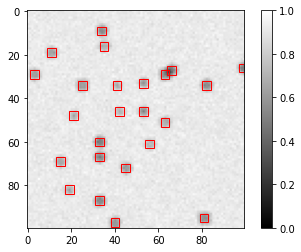

Image(array([[19., 38.,  2.,  2.],
       [76., 67.,  2.,  2.],
       [88., 58.,  2.,  2.],
       [71., 16.,  2.,  2.],
       [60., 79.,  2.,  2.],
       [36., 20.,  2.,  2.],
       [62., 15.,  2.,  2.],
       [ 8.,  1.,  2.,  2.],
       [83.,  3.,  2.,  2.],
       [89., 76.,  2.,  2.],
       [38.,  9.,  2.,  2.],
       [79., 79.,  2.,  2.],
       [58., 35.,  2.,  2.],
       [99., 32.,  2.,  2.],
       [39., 12.,  2.,  2.],
       [30., 84.,  2.,  2.],
       [18., 63.,  2.,  2.],
       [67., 83.,  2.,  2.],
       [76., 29.,  2.,  2.],
       [39., 91.,  2.,  2.]]))
Image(array([[19., 38.],
       [76., 67.],
       [88., 58.],
       [71., 16.],
       [60., 79.],
       [36., 20.],
       [62., 15.],
       [ 8.,  1.],
       [83.,  3.],
       [89., 76.],
       [38.,  9.],
       [79., 79.],
       [58., 35.],
       [99., 32.],
       [39., 12.],
       [30., 84.],
       [18., 63.],
       [67., 83.],
       [76., 29.],
       [39., 91.]]))


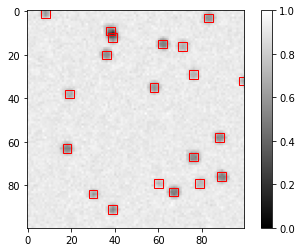

Image(array([[23., 57.,  2.,  2.],
       [38., 29.,  2.,  2.],
       [82., 37.,  2.,  2.],
       [46., 69.,  2.,  2.],
       [65.,  2.,  2.,  2.],
       [42., 41.,  2.,  2.],
       [18., 56.,  2.,  2.],
       [30., 79.,  2.,  2.],
       [71., 98.,  2.,  2.],
       [13., 39.,  2.,  2.],
       [77., 62.,  2.,  2.],
       [39., 99.,  2.,  2.],
       [65., 36.,  2.,  2.],
       [95., 72.,  2.,  2.],
       [10., 86.,  2.,  2.],
       [95.,  8.,  2.,  2.],
       [72., 37.,  2.,  2.],
       [18., 57.,  2.,  2.],
       [20., 35.,  2.,  2.],
       [ 5., 99.,  2.,  2.],
       [72.,  8.,  2.,  2.],
       [79., 18.,  2.,  2.]]))
Image(array([[23., 57.],
       [38., 29.],
       [82., 37.],
       [46., 69.],
       [65.,  2.],
       [42., 41.],
       [18., 56.],
       [30., 79.],
       [71., 98.],
       [13., 39.],
       [77., 62.],
       [39., 99.],
       [65., 36.],
       [95., 72.],
       [10., 86.],
       [95.,  8.],
       [72., 37.],
       [18., 57.],
      

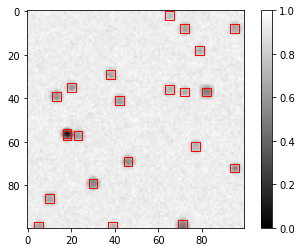

Image(array([[78.,  4.,  2.,  2.],
       [27., 55.,  2.,  2.],
       [ 6., 14.,  2.,  2.],
       [20., 36.,  2.,  2.],
       [92.,  7.,  2.,  2.],
       [56., 89.,  2.,  2.],
       [86., 94.,  2.,  2.],
       [36.,  0.,  2.,  2.],
       [26., 61.,  2.,  2.],
       [14., 68.,  2.,  2.],
       [36., 76.,  2.,  2.],
       [22.,  9.,  2.,  2.],
       [24., 19.,  2.,  2.],
       [81., 17.,  2.,  2.],
       [58., 10.,  2.,  2.],
       [62., 96.,  2.,  2.],
       [85., 88.,  2.,  2.],
       [78., 37.,  2.,  2.]]))
Image(array([[78.,  4.],
       [27., 55.],
       [ 6., 14.],
       [20., 36.],
       [92.,  7.],
       [56., 89.],
       [86., 94.],
       [36.,  0.],
       [26., 61.],
       [14., 68.],
       [36., 76.],
       [22.,  9.],
       [24., 19.],
       [81., 17.],
       [58., 10.],
       [62., 96.],
       [85., 88.],
       [78., 37.]]))


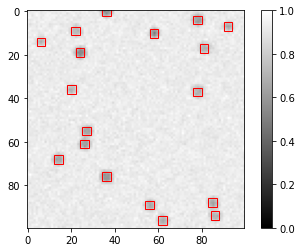

Image(array([[33., 87.,  2.,  2.],
       [89., 18.,  2.,  2.],
       [47., 79.,  2.,  2.],
       [25., 56.,  2.,  2.],
       [41.,  0.,  2.,  2.],
       [ 8., 62.,  2.,  2.],
       [83., 81.,  2.,  2.],
       [69., 79.,  2.,  2.],
       [80., 33.,  2.,  2.],
       [89., 73.,  2.,  2.],
       [52., 28.,  2.,  2.],
       [59.,  8.,  2.,  2.],
       [56., 88.,  2.,  2.],
       [60., 87.,  2.,  2.],
       [55., 30.,  2.,  2.]]))
Image(array([[33., 87.],
       [89., 18.],
       [47., 79.],
       [25., 56.],
       [41.,  0.],
       [ 8., 62.],
       [83., 81.],
       [69., 79.],
       [80., 33.],
       [89., 73.],
       [52., 28.],
       [59.,  8.],
       [56., 88.],
       [60., 87.],
       [55., 30.]]))


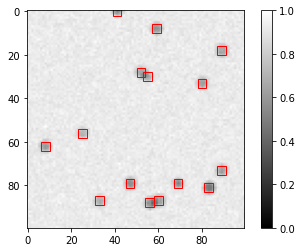

In [42]:
NUMBER_OF_IMAGES = 5

for _ in range(NUMBER_OF_IMAGES):
    particle.update()
    pos = pos.update()
    rad = rad.update()
    pos_and_rad = pos & rad
    bboxes = pos >> get_label
    label = bboxes.resolve()
    print(label)
    image_of_particle = particle.resolve()
    

    
    n = np.shape(label)[0]
    position_of_particles = label[:,0:2]
    print(position_of_particles)
    radius_of_particles = label[:,2] 
    
    plt.imshow(image_of_particle, cmap="gray", vmin = 0)
    plt.colorbar()
    ax = plt.gca()
    for i in range(int(n)):
        rect = plt.Rectangle((label[i,0]-label[i,2],label[i,1]-label[i,2]),2*label[i,2],2*label[i,2],linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    
    
    #plt.scatter(position_of_particles[:,0], position_of_particles[:,1], marker='+', edgecolors="r", linewidth=2)
    plt.show()

In [ ]:
from deeptrack.models.yolo.yolo import YOLOv3

model = YOLOv3(
    (256, 256, 1),
    2,
)

model.compile(optimizer="adam")

In [ ]:
from deeptrack.models.yolo.dataset import YoloDataGenerator

generator = YoloDataGenerator(
    feature=data,
    input_size=np.array([256]),
    num_class=2,
    label_function=lambda d: np.array(d[1:]),
    batch_size=4,
    min_data_size=100,
    max_data_size=200,
)

generator.anchors = model.anchors